# Category > Magazine Subcription

# 


In [32]:
# ! pip install pandas --quiet
# ! pip install matplotlib --quiet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
adf = pd.read_json('./data/Magazine_Subscriptions/Magazine_Subscriptions.jsonl',lines=True)

In [3]:
adf.shape

(71497, 10)

In [4]:
adf.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Great pictures and recipes,Wonderful recipes in this magazine.,[],B00HLSSQKK,B00HLSSQKK,AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,2020-12-15 15:29:02.433,0,True
1,4,great for kids who love sports!,Great sports magazine that's on my 9 year olds...,[],B002PXW04Y,B002PXW04Y,AHORTSSMI6ZZFUFWMPT4UFR2ISUQ,2016-08-12 03:28:32.000,1,True
2,5,A great look at what's new on the kosher scene...,"""Joy of Kosher"" magazine fills a much-needed n...",[],B00HCR5090,B00HCR5090,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2014-04-06 23:32:53.000,4,False
3,5,"If you enjoy reading an eye-catching, easy-to-...",I've been addicted to Martha Stewart's Everyda...,[],B0000ARXXS,B0000ARXXS,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2007-06-15 04:04:15.000,4,False
4,1,Too many “ gear ads” !!,Too many ads!,[],B0025ZOVEO,B0025ZOVEO,AFUB7CHTXRPD447QVQCHBZVN2IPQ,2020-06-01 21:24:40.246,13,True


Mean =  21.084340902388675
Median =  4.0


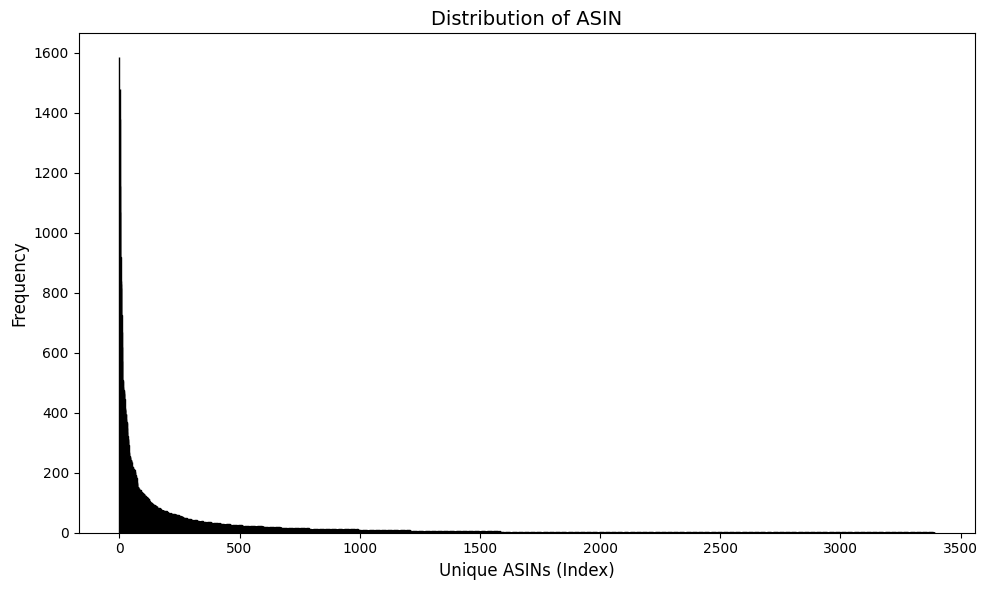

In [5]:
value_counts = adf['asin'].value_counts()
print("Mean = ",value_counts.mean())
print("Median = ",value_counts.median())
plt.figure(figsize=(10, 6))
plt.bar(range(len(value_counts)), value_counts, color='skyblue', edgecolor='black')
plt.title('Distribution of ASIN', fontsize=14)
plt.xlabel('Unique ASINs (Index)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

**Filter products with more than 500 reviews**

In [6]:
filtered_asins = value_counts[value_counts >= 500].index
filtered_adf = adf[adf['asin'].isin(filtered_asins)]
filtered_adf.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
14,5,Five Stars,AAA+++,[],B002PXVYEQ,B002PXVYEQ,AHWAIBCVNSK4HAJFE5DNRP636L2A,2016-02-18 23:26:28.000,0,True
18,2,"Some Decent Content, but drowned out in Advert...",We were looking for a magazine for our 4 year ...,[],B000063XJL,B000063XJL,AGLQQCIS5V6EGUCS5SSNHWZHQM6Q,2005-09-20 02:39:18.000,69,False
22,5,A terrific value,There is something in each edition of the maga...,[],B0032KHQTS,B0032KHQTS,AEKAQ5SHLEIE44SA3WXLLKD4RJVA,2020-11-11 21:20:04.446,0,True
26,4,Classic,A timeless classic.,[],B004GVZUUY,B004GVZUUY,AFE454TBPJXVP55M6STLR6R5664A,2021-06-06 20:11:22.043,0,True
54,2,"National Geographic Kids: Too Much Fluff, too ...",Kids like to read magazines and books as long ...,[],B000063XJL,B000063XJL,AFERCDY2EFJKT7QUQ75GISNHTFOQ,2012-05-06 14:48:55.000,8,False


In [7]:
# Group by 'asin' and apply transformations
result = filtered_adf.groupby('asin').apply(
    lambda group: pd.Series({
        'reviews': [{'review_title': title, 'review_text': text} for title, text in zip(group['title'], group['text'])],
        'total_reviews': len(group),
        'first_review_date': group['timestamp'].min(),
        'last_review_date': group['timestamp'].max(),
        'helpful_votes': group['helpful_vote'].tolist(),
        'verified_purchase': group['verified_purchase'].tolist()
    })
).reset_index()

# Serialize complex data types to JSON strings for saving in CSV
result['reviews'] = result['reviews'].apply(json.dumps)
result['helpful_votes'] = result['helpful_votes'].apply(json.dumps)
result['verified_purchase'] = result['verified_purchase'].apply(json.dumps)

# Save to CSV


/tmp/ipykernel_104928/1125711711.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = filtered_adf.groupby('asin').apply(


> :warning: **Saves a csv file!**

In [8]:
result.to_csv('./data/Magazine_Subscriptions/eda-magazine_subscription.csv', index=False)

In [41]:
# # Load the CSV
# test = pd.read_csv('../data/Magazine_Subscriptions/eda-magazine_subscription.csv')

# # Deserialize JSON strings back into Python objects
# test['reviews'] = test['reviews'].apply(json.loads)
# test['helpful_votes'] = test['helpful_votes'].apply(json.loads)
# test['verified_purchase'] = test['verified_purchase'].apply(json.loads)

# # Verify data types
# print(type(test.loc[0, 'reviews']))  # Should be a list of dicts
# print(type(test.loc[0, 'helpful_votes']))  # Should be a list of ints
# print(type(test.loc[0, 'verified_purchase']))  # Should be a list of booleans

In [42]:
top10 = value_counts.head(20)
top10

asin
B00005NIOH    1586
B002PXVYEQ    1479
B004GVZUUY    1381
B002PXW1IE    1155
B000063XJL    1068
B001THPA58     921
B002CT515Q     841
B001THPA26     828
B0089FUF6W     816
B003N3QRF8     727
B002PXW0EO     671
B002PXVYQY     620
B0032KHQTS     573
B004GVZUUE     510
B001THPA1C     506
B003N3QRFI     486
B0061SHL16     480
B007Q4WWLI     477
B001THPA3U     473
B004GVZUTU     466
Name: count, dtype: int64

In [43]:
bottom10 = value_counts.tail(10)
bottom10

asin
B01N79IEOC    1
B00MG6Q59Q    1
B00007KZJ2    1
B00006KMI6    1
B00006KAKV    1
B01M8NI288    1
B001CMRTYA    1
B002PXW0YE    1
B00006K88Z    1
B00007AVIC    1
Name: count, dtype: int64

<Axes: xlabel='asin'>

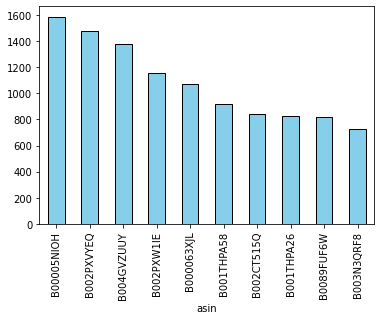

In [44]:
top_n = 10 
value_counts.head(top_n).plot(kind='bar', color='skyblue', edgecolor='black')

In [45]:
adf[adf['asin']=='B000063XJL']

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
18,2,"Some Decent Content, but drowned out in Advert...",We were looking for a magazine for our 4 year ...,[],B000063XJL,B000063XJL,AGLQQCIS5V6EGUCS5SSNHWZHQM6Q,2005-09-20 02:39:18.000,69,False
54,2,"National Geographic Kids: Too Much Fluff, too ...",Kids like to read magazines and books as long ...,[],B000063XJL,B000063XJL,AFERCDY2EFJKT7QUQ75GISNHTFOQ,2012-05-06 14:48:55.000,8,False
137,5,Nice,Son likes! He is 6 years old and sat still for...,[],B000063XJL,B000063XJL,AFOIBDPU4QUZS2L5QEOXA7HRRXKA,2016-06-24 12:32:17.000,0,True
140,5,they love them so much,"My kids fight over these, they love them so mu...",[],B000063XJL,B000063XJL,AHW4LOVWIR4WOR7DN5IPIV5PCSEA,2018-07-02 15:43:43.140,0,True
159,1,Nat Geo should be ashamed,My Grandkids have gotten 3 copies over a 6 mon...,[],B000063XJL,B000063XJL,AH7UKE3JVRDLDME7ZEDCPVF7QS5Q,2020-10-02 21:34:31.276,11,True
...,...,...,...,...,...,...,...,...,...,...
71252,5,Granddaughter loves animals and your magazine,My Granddaughter loves animals and your magazi...,[],B000063XJL,B000063XJL,AFZ4RT67Y74RQI3CYUONSIMSV5LQ,2013-02-22 06:58:39.000,1,True
71310,2,"Ok, but lots of advertisements",I thought the photography in the magazine was ...,[],B000063XJL,B000063XJL,AEIG45QUQ26ONU5QSLIMIGYTU6EQ,2007-11-25 11:01:01.000,8,False
71318,5,There are NO ads!,My granddaughter loves this magazine! I gave ...,[],B000063XJL,B000063XJL,AESDMXP7F42XLHASKXXEMYWBVPDA,2013-03-05 16:00:18.000,3,True
71411,4,ordering easy,Ordering was easy. A bit disappointed that the...,[],B000063XJL,B000063XJL,AFUQJZQAJW6AWOSBHOSWY5OMTUJQ,2015-01-07 14:29:34.000,0,True
